#Homework 1: kNN (20pt)
In this HW, you will write the $k$ Nearest Neighbors algorithm and run it on the synthetical data. Then, you will use the built-in function from *sklearn* library.

#Part I. Vanilla $k$NN (17.5pt)

In [51]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
import time
from mlxtend.plotting import plot_decision_regions
#import other modules here
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [24]:
# Generate synthetic dataset with 2 classes
X, y = make_classification(n_samples=300, n_features=2, n_redundant=0, random_state=31)

1. (0.5pt) Check the shapes of $X$ and $y$

In [25]:
#your code here
print(X.shape)
print(y.shape)

(300, 2)
(300,)


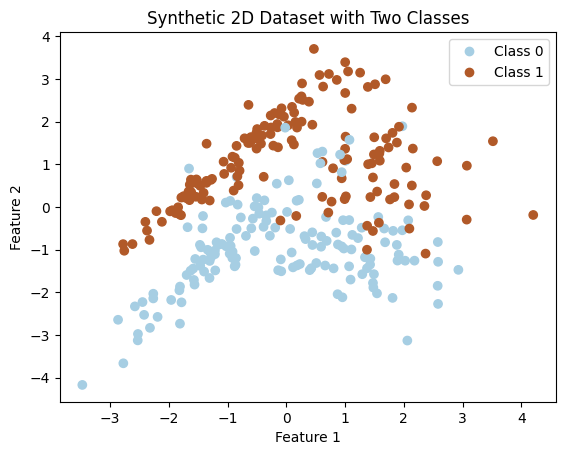

In [26]:
# Plot the synthetic dataset
scatter_train = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic 2D Dataset with Two Classes')
plt.legend(handles=scatter_train.legend_elements()[0], labels=['Class 0', 'Class 1'])

2. (1pt) Split the data into train and test sets. You can use a built-in [function train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from sklearn. (To get the same result as in the lecture slides, use the parameters from the example in the description of the function.)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

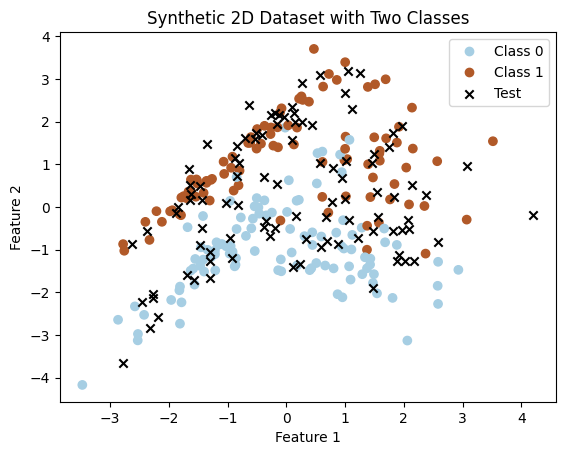

In [28]:
# Plot the synthetic dataset again
scatter_train = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
scatter_test = plt.scatter(X_test[:, 0], X_test[:, 1], c='black', marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic 2D Dataset with Two Classes')
plt.legend(handles=scatter_train.legend_elements()[0]+[scatter_test], labels=['Class 0', 'Class 1', 'Test'])

3. (9pt) Fill-in the functions *compute_distances_two_loops*, *compute_distances_one_loop*, and *predict_labels* of the followng class. Use $L_1$ (Manhattan) distance:
$$
d(x,\ x^{(i)}) =\sum_{j=1}^{d} |x_j-x^{(i)}_j|.
$$

In [108]:
class kNNClassifier:
  def __init__(self, k=1, n_loops=2):
     self.k = k
     self.n_loops = n_loops

  def fit(self, X, y):
    self.train_X = X
    self.train_y = y

  def predict(self, X):
    """
    X np array (n_samples, n_features)
    returns predicted class for each sample: np array (n_samples)
    """
    if self.n_loops == 2:
      distances = self.compute_distances_two_loops(X)
    elif self.n_loops == 1:
      distances = self.compute_distances_one_loop(X)
    return self.predict_labels(distances)

  def compute_distances_two_loops(self, X):
    """
    X np array (n_samples, n_features)
    returns distances between each test sampla and each train sample: np array (n_test_samples, n_train_samples)
    """
    n_test_samples = X.shape[0]
    n_train_samples = self.train_X.shape[0]
    distances = np.zeros((n_test_samples, n_train_samples))


    for i in range(n_test_samples):
      for j in range(n_train_samples):
        distances[i, j] = np.sum(np.abs(X[i] - self.train_X[j]))

    return distances

  def compute_distances_one_loop(self, X): #or without for loops at all (see ML2 problems)
    """
    X np array (n_samples, n_features)
    returns distances between each test sampla and each train sample: np array (n_test_samples, n_train_samples)
    """
    n_test_samples = X.shape[0]
    n_train_samples = self.train_X.shape[0]
    diff = X[:, None, :] - self.train_X[None, :, :]
    distances = np.sum(np.abs(diff), axis=2)
    return distances

  def predict_labels(self, distances):
    """
    distances: np array (n_test_samples, n_train_samples)
    output: np array (n_test_samples,)
    """
    n_test_samples = distances.shape[0]
    labels = np.zeros(n_test_samples)

    for i in range(n_test_samples):
      closest_indices = np.argsort(distances[i])[:self.k]
      closest_labels = self.train_y[closest_indices]
      labels[i] = np.argmax(np.bincount(closest_labels))

    return labels



4. Fit the model with 2 for loops (one neighbor)

In [109]:
# create an object of the class above
clf_2 = kNNClassifier()

In [110]:
# fit the model on the training data
clf_2.fit(X_train,y_train)

5. Fit the model with 1 for loop

In [111]:
# create an object of the class above
clf_1 = kNNClassifier(n_loops=1)

In [112]:
# fit the model on the training data
clf_1.fit(X_train,y_train)

6a). (0.5pt) Make a prediction on the points with coordinates $(0, -2)$

In [118]:
clf_1.predict(np.array([[0, -2]]))

array([0.])

6b). (0.5pt) Make a prediction on the points with coordinates $(0, 2)$

In [119]:
clf_1.predict(np.array([[0, 2]]))

array([1.])

7. Plot the decision boundary. You can use function [plot_decision_regions](https://rasbt.github.io/mlxtend/api_subpackages/mlxtend.plotting/#plot_decision_regions)

7.069661378860474

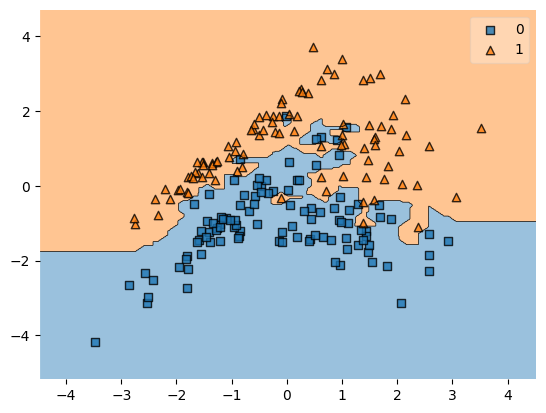

In [120]:
start_time = time.time()
plot_decision_regions(X_train,y_train,clf_1)
end_time = time.time()
end_time - start_time

429.0211548805237

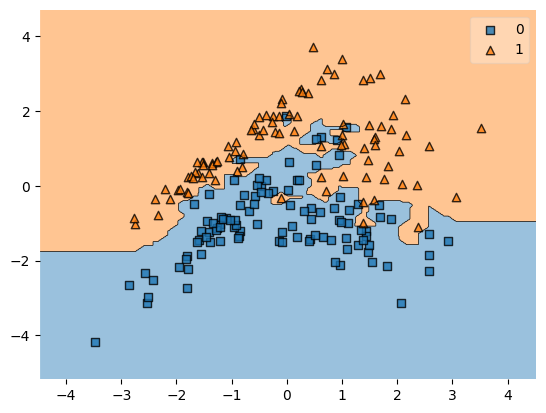

In [121]:
#You may whant to compare the performance with loops
start_time = time.time()
plot_decision_regions(X_train,y_train,clf_2)
end_time = time.time()
end_time - start_time

8. (2.5pt) Now, use the built-in class [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). Think about what parameter to use in order to get the same plot as above.

In [53]:
clf_3 = KNeighborsClassifier(n_neighbors=1)

In [72]:
# fit the model on the training data
clf_3.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

15.130353689193726

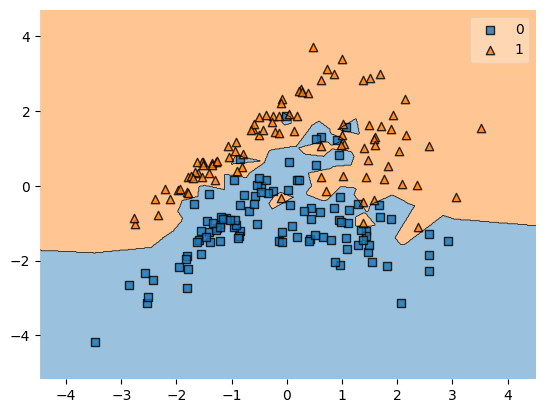

In [55]:
start_time = time.time()
plot_decision_regions(X_train,y_train,clf_3)
end_time = time.time()
end_time - start_time

9. (3pt) Choose $k.$  Write a for loop over 40 values of $k,$ for every $k$ train the fastest model on the train data and make prediction on the train and on the test data and store the accuracy on both sets. Plot the curves similar to ones in Lecture 2. To calculate accuracy you can use function [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score).  

In [122]:
for k in range(1,41):
  clf = (kNNClassifier(n_loops=1,k=k))
  clf.fit(X_train,y_train)
  y_pred_train = clf.predict(X_train)
  y_pred_test = clf.predict(X_test)
  acc_train = accuracy_score(y_train, y_pred_train)
  acc_test = accuracy_score(y_test, y_pred_test)
  print(f"k={k}, acc_train={acc_train}, acc_test={acc_test}")


k=1, acc_train=1.0, acc_test=0.8484848484848485
k=2, acc_train=0.9353233830845771, acc_test=0.8787878787878788
k=3, acc_train=0.9402985074626866, acc_test=0.8888888888888888
k=4, acc_train=0.9253731343283582, acc_test=0.9090909090909091
k=5, acc_train=0.9303482587064676, acc_test=0.9090909090909091
k=6, acc_train=0.9303482587064676, acc_test=0.8888888888888888
k=7, acc_train=0.9253731343283582, acc_test=0.8888888888888888
k=8, acc_train=0.9203980099502488, acc_test=0.898989898989899
k=9, acc_train=0.9203980099502488, acc_test=0.8888888888888888
k=10, acc_train=0.9154228855721394, acc_test=0.8888888888888888
k=11, acc_train=0.9203980099502488, acc_test=0.8888888888888888
k=12, acc_train=0.9253731343283582, acc_test=0.8888888888888888
k=13, acc_train=0.9154228855721394, acc_test=0.8888888888888888
k=14, acc_train=0.9154228855721394, acc_test=0.9090909090909091
k=15, acc_train=0.9154228855721394, acc_test=0.8888888888888888
k=16, acc_train=0.9104477611940298, acc_test=0.898989898989899
k=

10. For the 'best' $k$ plot the desicion boundary.

<Axes: >

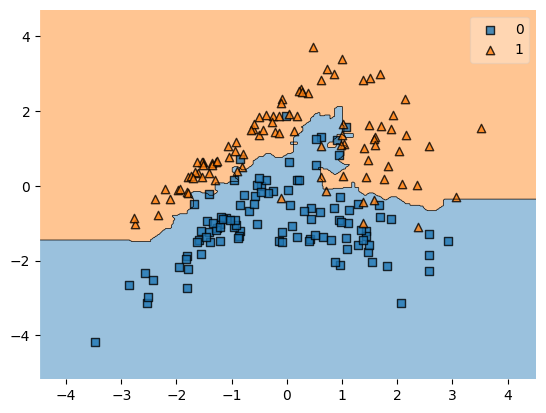

In [124]:
clf_4 = kNNClassifier(n_loops=1,k=4)
clf_4.fit(X_train,y_train)
plot_decision_regions(X_train,y_train,clf_4)

11. (0.5pt) Does the algorithm this this $k$ do a good job?

The alogirthm with this $k$ does a goob job as the accuracy is over 90%

#Part II. Weighted $k$NN (2.5pt)

1. (1.5pt) Modify the *predict_labels* function so that the score for class $c$ is calculated as follows:
$$
q(x)=\sum_{i=1}^{k}[y^{(i)}=c] \cdot \frac{1}{1+d(x,\ x^{(i)})}
$$
and the class with highest value of $q(x)$ is chosen as the label.

In [134]:
class kNNClassifier_w:
  def __init__(self, k=1):
     self.k = k

  def fit(self, X, y):
    self.train_X = X
    self.train_y = y

  def predict(self, X):
    """
    X np array (n_samples, n_features)
    returns predicted class for each sample: np array (n_samples)
    """
    distances = self.compute_distances(X)
    return self.predict_labels(distances)

  def compute_distances(self, X):
    """
    X np array (n_samples, n_features)
    returns distances between each test sampla and each train sample: np array (n_test_samples, n_train_samples)
    """
    n_test_samples = X.shape[0]
    n_train_samples = self.train_X.shape[0]
    diff = X[:, None, :] - self.train_X[None, :, :]
    distances = np.sum(np.abs(diff), axis=2)
    return distances

  def predict_labels(self, distances):
    n_test_samples = distances.shape[0]
    labels = np.zeros(n_test_samples)
    for i in range(n_test_samples):
      closest_indices = np.argsort(distances[i])[:self.k]
      closest_labels = self.train_y[closest_indices]





    return labels

2. Run this algorithm for $k=3$ and plot the desicion boundary.

In [135]:
clf_w = kNNClassifier_w(k=3)

In [136]:
clf_w.fit(X_train,y_train)

ValueError: operands could not be broadcast together with shapes (2,) (3,) 

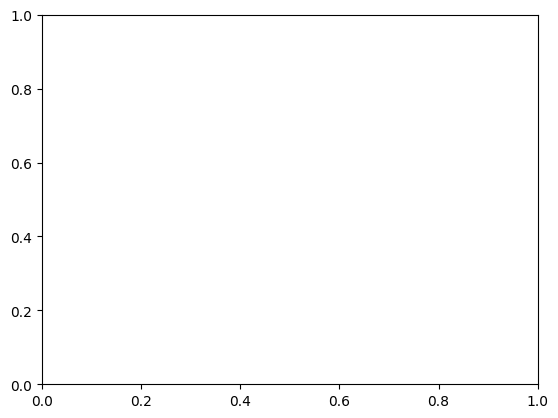

In [137]:
plot_decision_regions(X_train,y_train,clf_w)

3. (1pt) Use the buit-in algorithm with collable function

In [130]:
def func(d):
  return 1/(1+d)

<Axes: >

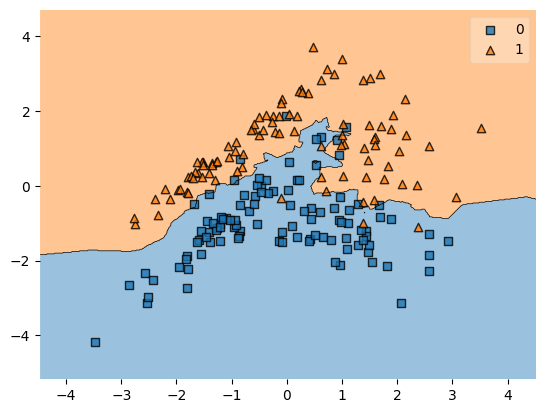

In [132]:
clf_5 = KNeighborsClassifier(n_neighbors=3, weights=func)
clf_5.fit(X_train,y_train)
plot_decision_regions(X_train,y_train,clf_5)

4. Does the desicion boundary look the same? You can also compare it with vanilla algorithm.